### <center> Regression

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
data = pd.read_csv('./Salary_dataset.csv',usecols=['YearsExperience','Salary'])
data.head(12)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.shape

(30, 2)

In [6]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
data.isnull().mean()*100

YearsExperience    0.0
Salary             0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

### Exploratory Data Analysis

#### Univariate Analysis

#### Histogram

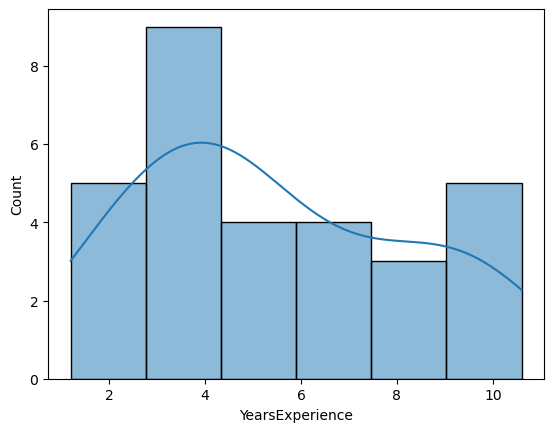

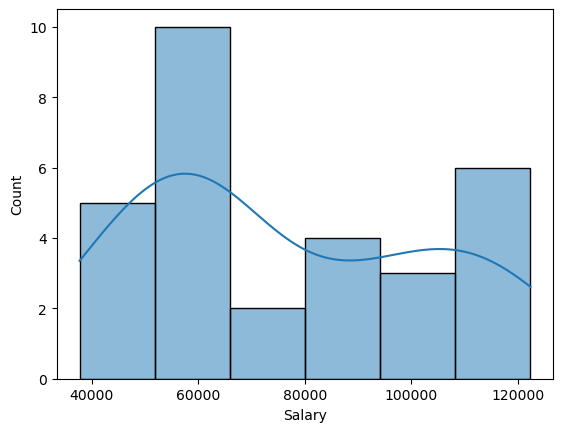

In [9]:
for i in data.columns:
    sns.histplot(x=data[i],kde = True)
    plt.show()

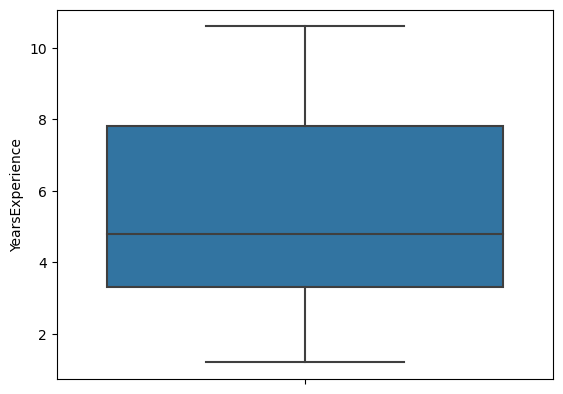

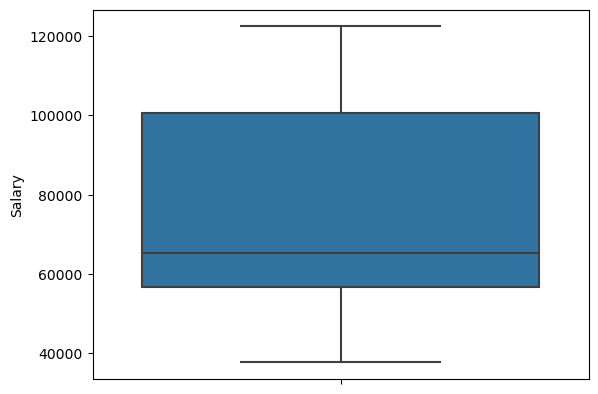

In [10]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show()

There are no outliers

#### Multivariate analysis

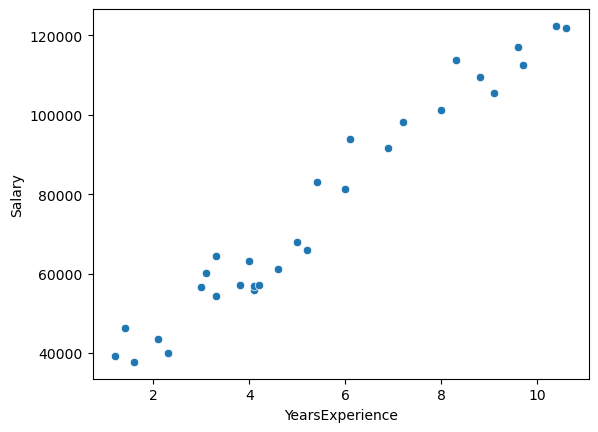

In [11]:
sns.scatterplot(data=data,x = 'YearsExperience',y = 'Salary')
plt.show()

#### Heatmap

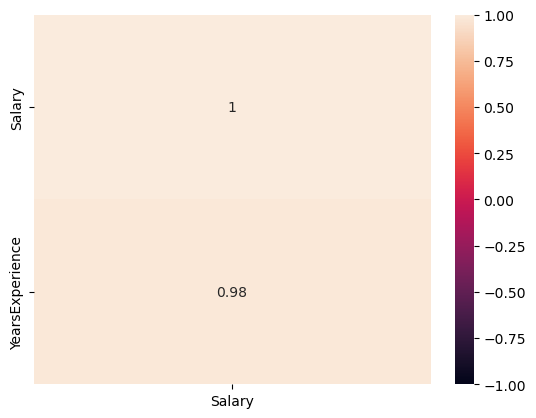

In [12]:
sns.heatmap(data.corr()[['Salary']].sort_values(by='Salary',ascending=False),vmin=-1,vmax=1,annot=True)
plt.show()

#### Selecting features and Targets

In [13]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

#### Feature scaling

#### Initialising Standard Scaler

In [14]:
sc = StandardScaler()

In [15]:
x = sc.fit_transform(x)

#### Splitting the data into training and testing sets

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=95,shuffle=True)

#### Model building

#### Initialising the model

In [65]:
model = LinearRegression()

#### Fitting the model with training data

In [66]:
model.fit(x_train,y_train)

LinearRegression()

#### Predicting using the test data

In [67]:
y_pred = model.predict(x_test)

#### Evaluating the accuracy

In [68]:
r2_score(y_test,y_pred)

0.9059754831220264

#### Testing the accuracy

In [69]:
model.score(x_test,y_test)

0.9059754831220264

#### Training accuracy

In [70]:
model.score(x_train,y_train)

0.9628100775182297

#### MAE

In [71]:
mean_absolute_error(y_test,y_pred)

5614.924450638489

#### MSE

In [72]:
mean_squared_error(y_test,y_pred)

36321901.77589211

#### Root mean squared error

In [73]:
np.sqrt(mean_squared_error(y_test,y_pred))

6026.765448886501

#### Creating a dataframe with y_test and y_pred

In [74]:
OUTPUT =pd.DataFrame(zip(y_test,y_pred),columns=['ACTUAL','PREDICTION'])

In [75]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,91739.0,90338.427732
1,66030.0,74124.891789
2,112636.0,117043.075169
3,60151.0,54096.406212
4,56958.0,63633.780296


#### Plotting the result

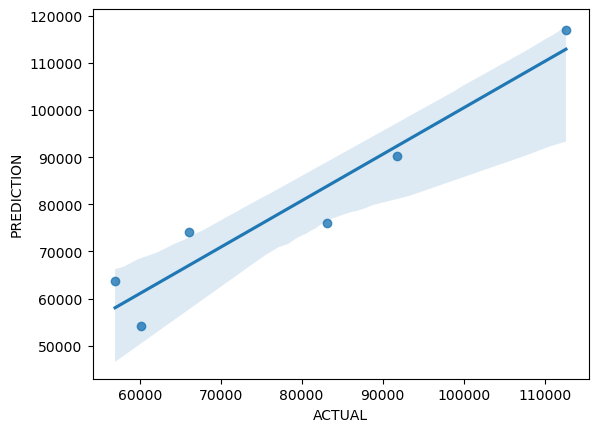

In [76]:
sns.regplot(data=OUTPUT,x = 'ACTUAL',y = 'PREDICTION')
plt.show()

#### Model building

In [77]:
Model = Lasso()

#### Fitting the model with training data

In [78]:
Model.fit(x_train,y_train)

Lasso()

#### Predicting using the test data

In [79]:
y_pred = Model.predict(x_test)

#### Evaluating the accuracy

In [80]:
r2_score(y_test,y_pred)

0.9059813217108805

#### Testing the accuracy

In [81]:
Model.score(x_test,y_test)

0.9059813217108805

#### Training accuracy

In [82]:
Model.score(x_train,y_train)

0.962810076396386

#### MAE

In [83]:
mean_absolute_error(y_test,y_pred)

5614.729117502157

#### MSE

In [84]:
mean_squared_error(y_test,y_pred)

36319646.31467935

#### Root Mean Squared Error

In [85]:
np.sqrt(mean_squared_error(y_test,y_pred))

6026.578325607272

#### Creating a dataframe with y_test and y_pred

In [86]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])

In [87]:
Output.head()

,Actual,Prediction
0,91739.0,90337.917696
1,66030.0,74124.935196
2,112636.0,117041.653577
3,60151.0,54097.133285
4,56958.0,63634.181814


#### Plotting the result

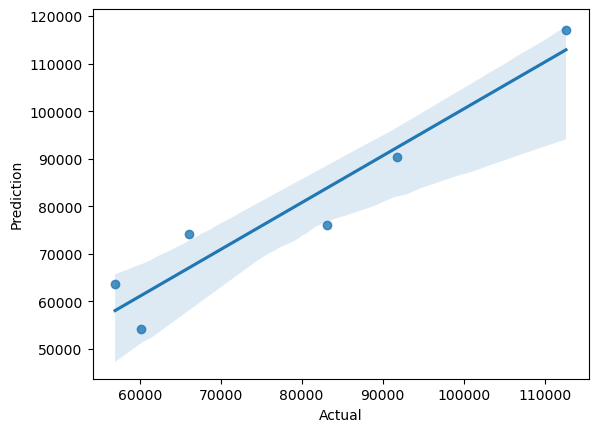

In [88]:
sns.regplot(data = Output,x = 'Actual',y = 'Prediction')
plt.show()

#### Model Building

#### Initialising the model

In [89]:
MODEL = Ridge()

#### Fitting the model with training data

In [90]:
MODEL.fit(x_train,y_train)

Ridge()

#### Predicting using the test data

In [91]:
y_pred = MODEL.predict(x_test)

#### Evaluating the accuracy

In [92]:
r2_score(y_test,y_pred)

0.9107504000342639

#### Testing accuracy

In [93]:
MODEL.score(x_test,y_test)

0.9107504000342639

#### Training accuracy

In [94]:
MODEL.score(x_train,y_train)

0.9615296146865079

#### MAE

In [95]:
mean_absolute_error(y_test,y_pred)

5406.238485438859

#### MSE

In [96]:
mean_squared_error(y_test,y_pred)

34477339.64642731

#### Root mean squared error

In [97]:
np.sqrt(mean_squared_error(y_test,y_pred))

5871.740767985872

#### Creating a dataframe with y_test and y_pred

In [98]:
output = pd.DataFrame(zip(y_test,y_pred),columns=['actual','prediction'])

In [99]:
output.head()

,actual,prediction
0,91739.0,89793.525490
1,66030.0,74171.266448
2,112636.0,115524.305088
3,60151.0,54873.181749
4,56958.0,64062.745891


#### Plotting the result

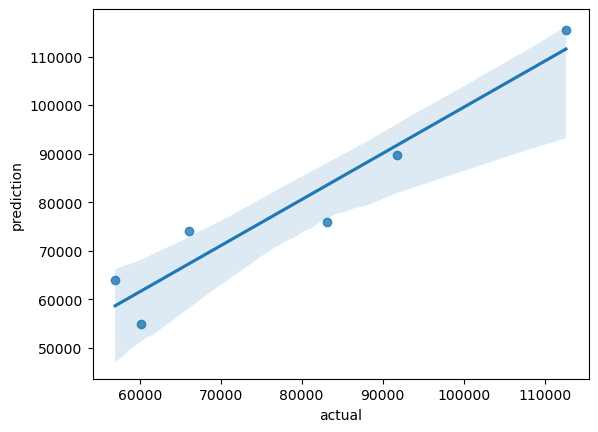

In [100]:
sns.regplot(data=output,x='actual',y='prediction')
plt.show()

In [101]:
model1 = AdaBoostRegressor()

In [102]:
model1.fit(x_train,y_train)

AdaBoostRegressor()

In [103]:
y_pred=model1.predict(x_test)

#### Evaluating the accuracy

In [104]:
r2_score(y_test,y_pred)

0.8830976760393107

#### Testing accuracy

In [105]:
model1.score(x_test,y_test)

0.8830976760393107

#### Training accuracy

In [106]:
model1.score(x_train,y_train)

0.9899637047361903

#### MAE

In [107]:
mean_absolute_error(y_test,y_pred)

4682.259259259259

#### MSE

In [108]:
mean_squared_error(y_test,y_pred)

45159654.83539095

#### Root mean squared error

In [109]:
np.sqrt(mean_squared_error(y_test,y_pred))

6720.093365079904

In [110]:
output1 = pd.DataFrame(zip(y_test,y_pred),columns=['act','pred'])

In [111]:
output1.head()

,act,pred
0,91739.0,95385.333333
1,66030.0,67939.000000
2,112636.0,116970.000000
3,60151.0,59347.666667
4,56958.0,59208.888889


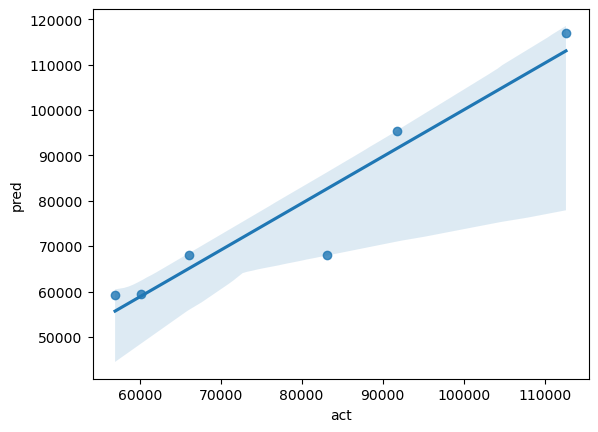

In [112]:
sns.regplot(data=output1,x='act',y='pred')
plt.show()